In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

In [2]:
save_dir = '../saves/tuning/runs/batch'

In [7]:
os.listdir(save_dir)

['b036_e2000_l5',
 'b064_e3500_l5',
 'b096_e5250_l5',
 'b128_e7000_l5',
 'b196_e10500_l5',
 'b250_e14000_l5',
 'time.csv']

In [8]:
import re
def read_mmd(dir):
    mmd_train = []
    mmd_test = []
    for folder in glob(dir+'/*/'):
        with open(os.path.join(folder, "MMD_log.txt")) as log:
            mmd_train.append(float(re.findall(r'\d+\.?\d*e?\-*\d*', log.readline())[0]))
            mmd_test.append(float(re.findall(r'\d+\.?\d*e?\-*\d*', log.readline())[0]))
    return np.array(mmd_train), np.array(mmd_test)
    

In [9]:
def plot_bar(idx, tr_mean, tr_std, ts_mean, ts_std):
    plt.bar(idx-0.2, tr_mean, width=0.4, yerr=tr_std, label='training', color='dimgrey')
    plt.bar(idx+0.2, ts_mean, width=0.4, yerr=ts_std,label='validation', color='darkgrey')

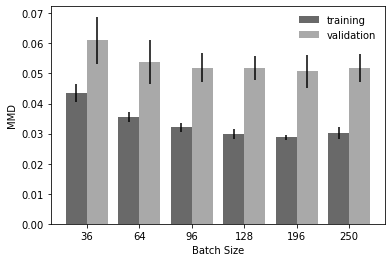

In [36]:
tr_m = []; tr_s = []
ts_m = []; ts_s = []

for i, subdir in enumerate(glob(save_dir+'/*/')):
    if i==10: continue
    tr, ts = read_mmd(subdir)
    tr_m.append(tr.mean()); tr_s.append(tr.std())
    ts_m.append(ts.mean()); ts_s.append(ts.std())

tr_m = np.array(tr_m); tr_s = np.array(tr_s)
ts_m = np.array(ts_m); ts_s = np.array(ts_s)
plot_bar(np.arange(len(tr_m)), tr_m, tr_s, ts_m, ts_s)
# plt.title('Batch Size - MMD')
plt.xticks(range(len(tr_m)), labels=['36', '64', '96', '128', '196', '250'])
plt.xlabel('Batch Size')
# plt.xticks(range(len(tr_m)), labels=['0.5', '1', '5', '10', '50'])
# plt.xlabel('Regularization Weight $\lambda$')
# plt.xticks(range(len(tr_m)), labels=['$c_1$', '$c_2$'])
# plt.xlabel('Cost Function')
plt.ylabel('MMD')
plt.legend(loc=1, frameon=False)
plt.show()

In [14]:
print(tr_m, tr_s, ts_m, ts_s, sep="\n")

[0.04361948 0.03543227 0.03212831 0.02991361 0.0287975  0.03012163]
[0.00298474 0.00163165 0.00152197 0.0015781  0.00078551 0.00197426]
[0.06103211 0.0537114  0.05189805 0.05187315 0.0506875  0.05172544]
[0.00783949 0.00728189 0.00489108 0.00388722 0.00560326 0.00469806]


# Training History

In [15]:
save_dir = '../saves/tuning/runs/epochs/b128_e20000_l5/'

In [16]:
from numpy import genfromtxt
mmd_data = genfromtxt(save_dir+'mmd.csv')

In [17]:
mmd_data.shape

(201, 9)

In [18]:
steps = mmd_data[:, 0]+1
mmd_train = mmd_data[:, 1:5]
mmd_val = mmd_data[:, 5:9]

In [19]:
tr_mean = mmd_train.mean(-1)
tr_std = mmd_train.std(-1)
val_mean = mmd_val.mean(-1)
val_std = mmd_val.std(-1)

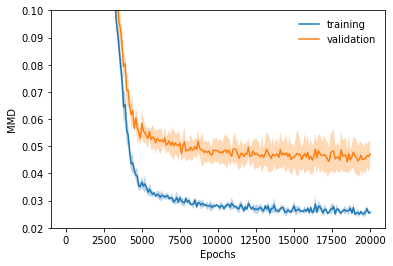

In [20]:
# plt.gcf().set_size_inches(18.5, 10.5)
plt.plot(steps, tr_mean, label='training')
plt.plot(steps, val_mean, label='validation')
plt.fill_between(steps, tr_mean+tr_std, tr_mean-tr_std, alpha=0.3)
plt.fill_between(steps, val_mean+val_std, val_mean-val_std, alpha=0.3)
plt.legend(frameon=False)
plt.ylim(0.02, 0.1)
plt.xlabel('Epochs')
plt.ylabel('MMD')
plt.show()

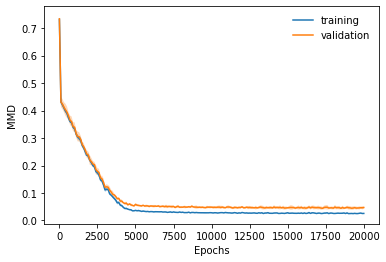

In [21]:
plt.plot(steps, tr_mean, label='training')
plt.plot(steps, val_mean, label='validation')
plt.fill_between(steps, tr_mean+tr_std, tr_mean-tr_std, alpha=0.3)
plt.fill_between(steps, val_mean+val_std, val_mean-val_std, alpha=0.3)
plt.legend(frameon=False)
# plt.ylim(0.02, 0.1)
plt.xlabel('Epochs')
plt.ylabel('MMD')
plt.show()

# Time Cost

In [30]:
save_dir = '../saves/tuning/runs/batch/'

In [31]:
time_data = genfromtxt(save_dir+'time.csv') / 42000

In [32]:
time_data

array([[0.0437619 , 0.03697619, 0.03602381, 0.03571429],
       [0.04969048, 0.04695238, 0.04640476, 0.04519048],
       [0.0622381 , 0.06292857, 0.06488095, 0.06554762],
       [0.08302381, 0.08364286, 0.08395238, 0.08357143],
       [0.14330952, 0.14654762, 0.14602381, 0.15090476],
       [0.22680952, 0.2275    , 0.22795238, 0.22807143]])

In [33]:
epochs = np.array([36, 64, 96, 128, 196, 250])
t_mean = time_data.mean(-1)
t_std = time_data.std(-1)

In [34]:
model = np.poly1d(np.polyfit(epochs, t_mean, 2))

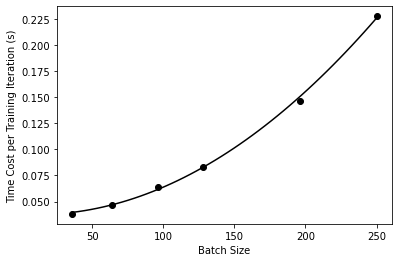

In [35]:
ep = np.linspace(36, 250)
plt.scatter(epochs, t_mean, c='black')
# plt.errorbar(epochs, t_mean, yerr=t_std, fmt='o')
plt.plot(ep, model(ep), c='black')
# plt.fill_between(epochs, t_mean+t_std, t_mean-t_std, alpha=0.3)
# plt.ylim(0.02, 0.1)
plt.xlabel('Batch Size')
plt.ylabel('Time Cost per Training Iteration (s)')
plt.show()